In [2]:
! git clone https://github.com/ANN-2019-2/evaluacion-deescobarc.git

Cloning into 'evaluacion-deescobarc'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 47 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.


#Librerías a utilizar

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

from sklearn.linear_model import LinearRegression #Regresión Lineal con scikit-learn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold

#Pruebas GPU

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

#Leer los datos

In [0]:
dt = pd.read_csv("evaluacion-deescobarc/datos/diabetes.csv")

#Se realiza un analísis previo de todos los datos

In [6]:
# resumen estadístico con pandas
dt.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634599e-16,1.296411e-16,-8.042209e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.575274e-16,3.780755e-16,-3.830854e-16,-3.411950e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


##Se valida que variable no es relevante

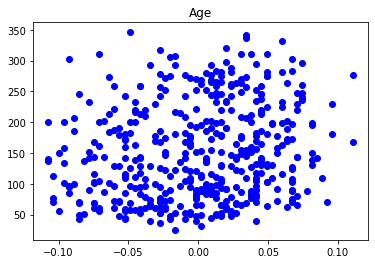

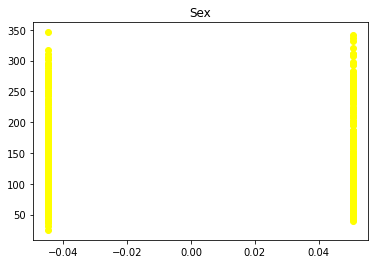

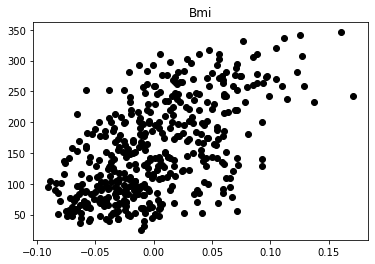

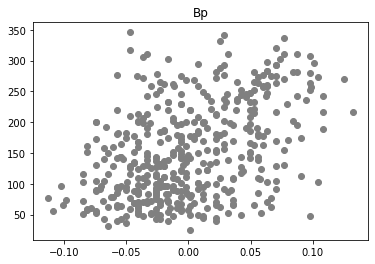

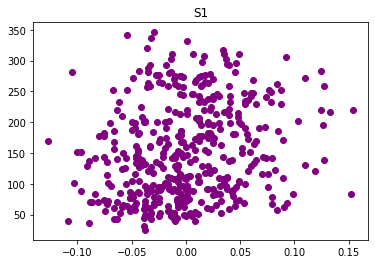

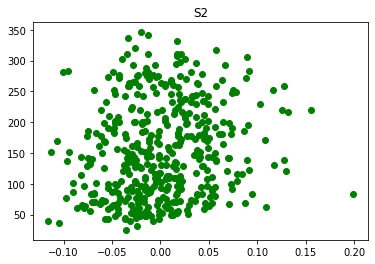

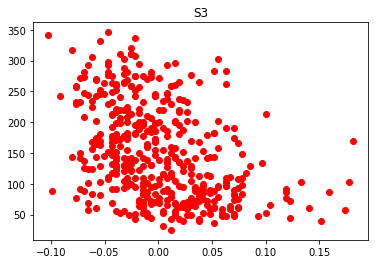

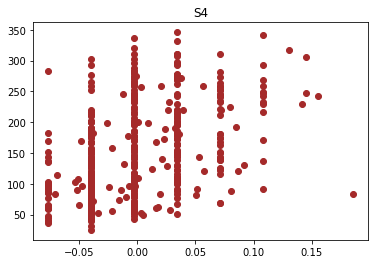

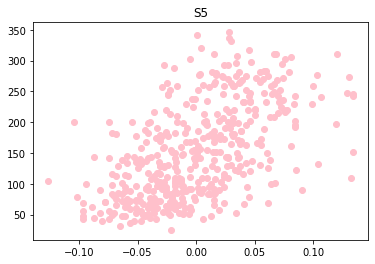

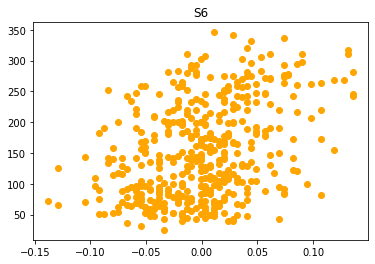

In [7]:
plt.figure(figsize=(6,4))
plt.scatter(dt.age, dt.Y,label='data', color='blue')
plt.title('Age');

plt.figure(figsize=(6,4))
plt.scatter(dt.sex, dt.Y,label='data', color='yellow')
plt.title('Sex');

plt.figure(figsize=(6,4))
plt.scatter(dt.bmi, dt.Y,label='data', color='black')
plt.title('Bmi');

plt.figure(figsize=(6,4))
plt.scatter(dt.bp, dt.Y,label='data', color='gray')
plt.title('Bp');

plt.figure(figsize=(6,4))
plt.scatter(dt.s1, dt.Y,label='data', color='purple')
plt.title('S1');

plt.figure(figsize=(6,4))
plt.scatter(dt.s2, dt.Y,label='data', color='green')
plt.title('S2');

plt.figure(figsize=(6,4))
plt.scatter(dt.s3, dt.Y,label='data', color='red')
plt.title('S3');

plt.figure(figsize=(6,4))
plt.scatter(dt.s4, dt.Y,label='data', color='brown')
plt.title('S4');

plt.figure(figsize=(6,4))
plt.scatter(dt.s5, dt.Y,label='data', color='pink')
plt.title('S5');

plt.figure(figsize=(6,4))
plt.scatter(dt.s6, dt.Y,label='data', color='orange')
plt.title('S6');

#Modelo lineal

In [8]:
##
## Se usa la función LinearRegresion() para
## estimar el modelo de regresión lineal.
##

## Crea el modelo
linearRegression = LinearRegression(
    fit_intercept=True,               # ?intercepto (w0)
    normalize=False,                  # solo para fit_intercept == False
    copy_X=True                       # copia X o lo sobreescribe
)

## Calibra el modelo
linearRegression.fit(dt.drop("Y",axis=1), dt.Y)

## Imprime los coeficientes:
print('Coeficientes: ', linearRegression.coef_)

## Imprime el intercepto:
print('Intercepto: ', linearRegression.intercept_)

Coeficientes:  [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
Intercepto:  152.1334841628965


In [9]:
df = dt.drop("Y",axis=1)
df['y_pred'] = linearRegression.predict(dt.drop("Y",axis=1))
df.y_pred.head()

0    206.117070
1     68.072348
2    176.884060
3    166.917966
4    128.459842
Name: y_pred, dtype: float64

#Transformación variable dependiente

In [0]:
#Raíz Cuadrada
#d_raiz = sc.fit_transform(data_day_r["Valor"].apply(np.sqrt).values.reshape(-1,1)).reshape(-1,)
y_raiz = dt.Y.apply(np.sqrt)
#Logaritmo Natural
#d_log = sc.fit_transform(data_day_r["Valor"].apply(np.log).values.reshape(-1,1)).reshape(-1,)
y_log = dt.Y.apply(np.log)
#Raíz Cúbica
#d_cubo = sc.fit_transform(data_day_r["Valor"].apply(lambda x: x**3).values.reshape(-1,1)).reshape(-1,)
y_cubo = dt.Y.apply(lambda x : x**(1/3))

##Se crea una función para que realice la regresión con distintas variables dependientes

In [0]:
def mod_regre(d, Y):
  #Se parten los datos 
  x_fit, x_test, y_fit, y_test = train_test_split(d,Y, test_size=0.2, random_state=101)
  lm = LinearRegression()
  lm.fit(x_fit,y_fit)
  predictions = lm.predict(x_test)
  
  return y_test, predictions


##Se realiza el entrenamiento y pronóstico para cada transformación

El procedimiento es el siguiente:

- Se construye el mejor modelo posible.
- Se pronostican los datos de entrenamiento y prueba.
- Se aplica la transformación inversa a los pronosticos de entrenamiento y prueba.
- Se calcula la función de pérdida para los pronósticos con la transformación inversa.

Viendo los resultados **Lo más óptimo es no transformar la variable dependiente dado que es la que menor error tiene**


In [12]:
d = dt.drop("Y",axis=1)
er_mae = []
er_mse = []

#Sin transformación
y_test, pred = mod_regre(d, dt.Y)
er_mae.append(metrics.mean_absolute_error(y_test, pred))
er_mse.append(metrics.mean_squared_error(y_test, pred))

#Raíz
y_test, pred = mod_regre(d, y_raiz)
y_test = pd.Series(y_test).apply(lambda x : x**2)
pred = pd.Series(pred).apply(lambda x : x**2)
er_mae.append(metrics.mean_absolute_error(y_test, pred))
er_mse.append(metrics.mean_squared_error(y_test, pred))

#Logaritmo natural
y_test, pred = mod_regre(d, y_log)
y_test = pd.Series(y_test).apply(lambda x : math.e**x)
pred = pd.Series(pred).apply(lambda x : math.e**x)
er_mae.append(metrics.mean_absolute_error(y_test, pred))
er_mse.append(metrics.mean_squared_error(y_test, pred))

#Raíz Cúbica
y_test, pred = mod_regre(d, y_cubo)
y_test = pd.Series(y_test).apply(lambda x : x**3)
pred = pd.Series(pred).apply(lambda x : x**3)
er_mae.append(metrics.mean_absolute_error(y_test, pred))
er_mse.append(metrics.mean_squared_error(y_test, pred))

print(er_mae, er_mse)
print('Menor MAE: ' +str(min(er_mae)), 'Menor MSE:' + str(min(er_mse)))

[42.434277522023685, 42.771364574207155, 43.618937640080084, 43.01307955283345] [2778.5838755307395, 2795.868302922532, 2928.227272767631, 2824.3390043559593]
Menor MAE: 42.434277522023685 Menor MSE:2778.5838755307395


#Red Neuronal 

In [0]:
x_fit, x_test, y_fit, y_test = train_test_split(d, dt.Y, test_size=0.2, random_state=101)

age = tf.feature_column.numeric_column('age')
sex = tf.feature_column.numeric_column('sex')
bmi = tf.feature_column.numeric_column('bmi')
bp  = tf.feature_column.numeric_column('bp')
s1  = tf.feature_column.numeric_column('s1')
s2  = tf.feature_column.numeric_column('s2')
s3  = tf.feature_column.numeric_column('s3')
s4  = tf.feature_column.numeric_column('s4')
s5  = tf.feature_column.numeric_column('s5')
s6  = tf.feature_column.numeric_column('s6')

colum = [age, sex, bmi, bp, s1, s2, s3, s4, s5, s6]

func_entrada = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_fit,y=y_fit ,batch_size=10, num_epochs=3000,shuffle=True)

##Validación número de neuronas

Se verifica con cuántas neuronas se comporta mejor la red neuronal

In [0]:
neuronas = [2,4,8,16,32,64]
history = []

#Se recorren la cantidad de neuronas para validar con cuantas es mejor
for i in neuronas:
  model = tf.estimator.DNNRegressor(hidden_units=[i,i,i,i,i],feature_columns=colum)
  model.train(input_fn=func_entrada,steps=5000)
  predict_func_entrada = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test,batch_size=10,num_epochs=1,shuffle=False)
  pred_gen = model.predict(predict_func_entrada)
  predictions = list(pred_gen)
  final_preds = []

  for pr in predictions:
      final_preds.append(pr['predictions']) 

  history.append(metrics.mean_squared_error(y_test,final_preds))



Según la gráfica es considerable elegir 32 neuronas

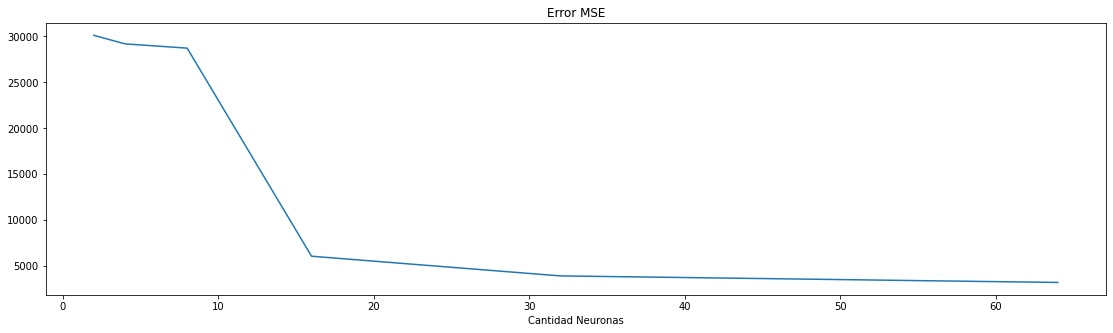

In [16]:
plt.figure(figsize=(19,5))
plt.xlabel('Cantidad Neuronas')
plt.title("Error MSE")
plt.plot(neuronas, history)

##Neuronas en la capa oculta

Luego de saber que se necesitan 32 neuronas se valida cuántas en la capa oculta

In [0]:
layers = [[32],[32,32],[32,32,32],[32,32,32,32], [32,32,32,32,32]]
history_layers = []

for layer in layers:
  model = tf.estimator.DNNRegressor(hidden_units=layer,feature_columns=colum)
  model.train(input_fn=func_entrada,steps=5000)

  predict_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test,batch_size=10,num_epochs=1,shuffle=False)

  pred_gen = model.predict(predict_input_func)
  predictions = list(pred_gen)
  final_preds = []

  for pred in predictions:
      final_preds.append(pred['predictions'])

  history_layers.append(metrics.mean_squared_error(y_test,final_preds))

Se gráfica para validar el resultado, donde se observa que lo ideal es tomar 4 capas ocultas

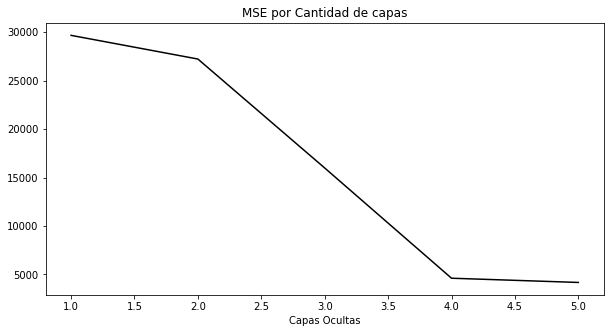

In [18]:
plt.figure(figsize=(10,5))
plt.xlabel('Capas Ocultas')
plt.title("MSE por Cantidad de capas")
plt.plot([1,2,3,4,5], history_layers, 'black')

#Red Neuronal con los parámetros óptimos encontrados



In [0]:
tf.compat.v1.reset_default_graph()

model = tf.estimator.DNNRegressor(hidden_units=[32,32,32,32],feature_columns=colum)
model.train(input_fn=func_entrada,steps=5000)
predict_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test,batch_size=10,num_epochs=1,shuffle=False)
pred_gen = model.predict(predict_input_func)
predictions = list(pred_gen)
final_preds = []

for pred in predictions:
    final_preds.append(pred['predictions'])

##Gráfica de dispersión

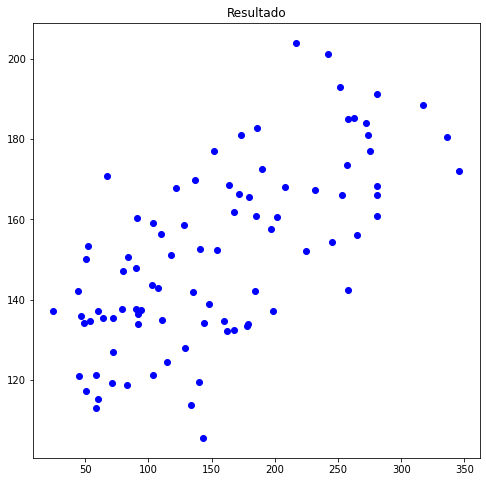

In [20]:
plt.figure(figsize=(8,8))
plt.title("Resultado")
plt.scatter(y_test,final_preds,color="blue")

##Cálculo del error

In [21]:
print("MAE: " + str(metrics.mean_absolute_error(y_test, final_preds)), "MSE: " + str(metrics.mean_squared_error(y_test, final_preds)))

MAE: 56.11390806048104 MSE: 4498.281676947369


#Técnica K-fold crossvalidation

In [0]:
X = d.values
y = dt.Y.values

def correr_modelo(fit_i, test_i,X,y):    
      
  X_fit, X_test = pd.DataFrame(X[fit_i]), pd.DataFrame(X[test_i])
  y_fit, y_test = pd.DataFrame(y[fit_i]), pd.DataFrame(y[test_i])
  
  col = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
  X_fit.columns  =  col
  X_test.columns  =  col

  age = tf.feature_column.numeric_column('age')
  sex = tf.feature_column.numeric_column('sex')
  bmi = tf.feature_column.numeric_column('bmi')
  bp = tf.feature_column.numeric_column('bp')
  s1 = tf.feature_column.numeric_column('s1')
  s2 = tf.feature_column.numeric_column('s2')
  s3 = tf.feature_column.numeric_column('s3')
  s4 = tf.feature_column.numeric_column('s4')
  s5 = tf.feature_column.numeric_column('s5')
  s6 = tf.feature_column.numeric_column('s6')

  cols = [age, sex, bmi, bp, s1, s2, s3, s4, s5, s6]
  fun_entr = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_fit,y= y_fit[0],batch_size=10,num_epochs=3000,shuffle=False)  
  model = tf.estimator.DNNRegressor(hidden_units=[32,32,32,32],feature_columns=cols)
  model.train(input_fn=fun_entr,steps=5000)
  predict_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)
  pred_gen = model.predict(predict_input_func)
  predictions = list(pred_gen)
  final_preds = []

  for pred in predictions:
      final_preds.append(pred['predictions'])   

  return metrics.mean_squared_error(y_test, final_preds)

In [0]:
kf = KFold(n_splits=4)          ## se generan 5 grupos
mse_cross = 0
count = 0
for train, test in kf.split(X):
    #print("%s %s" % (train, test))
    count += 1
    mse_cross += correr_modelo(train,test,X,y)

##Reporte del error promedio

In [47]:
print("MSE CROSSVALIDATION: " + str( mse_cross/count))

MSE CROSSVALIDATION: 4698.16981190393
